# Data Wrangling - Vrije Universiteit Amsterdam - January Intensive 2020 #

Lanie Preston (VU Student Nr: 2629403)

Floor Kouwenberg (VU Student Nr: 2618232)

In [6]:
#read in libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

We will first import all the necessary datesets. We could get some of the datasets by downloading them from websites. However, other datasets got imported via their URL. Below we will import four datasets:
 * The US dairy production per year
 * The party division per year of the United States Congress
 * The dollar amount of subsidies given to dairy farmers per year by the US government
 * The dollar amount of lobbies from the dairy industry given to US politicians per year

## Annual Dairy Production ## 

In this section, we read in data from the USDA corresponding with the annual level of per capita milk production in the United Sates to examine how the American dairy industry has grown or shrunk over time. 

In [7]:
us_dairy_production = pd.read_excel('annualmilkprodfactors.xlsx', index_col=0)
us_dairy_production = us_dairy_production.dropna(axis=0)
milk_production =  us_dairy_production[['Milk production']]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-aa9935dc6689>", line 1, in <module>
    us_dairy_production = pd.read_excel('annualmilkprodfactors.xlsx', index_col=0)
  File "//anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py", line 188, in wrapper
    return func(*args, **kwargs)
  File "//anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py", line 188, in wrapper
    return func(*args, **kwargs)
  File "//anaconda3/lib/python3.7/site-packages/pandas/io/excel.py", line 350, in read_excel
    io = ExcelFile(io, engine=engine)
  File "//anaconda3/lib/python3.7/site-packages/pandas/io/excel.py", line 653, in __init__
    self._reader = self._engines[engine](self._io)
  File "//anaconda3/lib/python3.7/site-packages/pandas/io/excel.py", line 424, in __init__
    self.book = xlrd.open_workbook(

FileNotFoundError: [Errno 2] No such file or directory: 'annualmilkprodfactors.xlsx'

## Party Divisions in Congress ##

In this section, we read in data on how many Republicans and Democrats were in Congress per year to find the relative percentages of each party. 

In [3]:
#seats per party per year 
senate_division = pd.read_html("https://en.wikipedia.org/wiki/Party_divisions_of_United_States_Congresses")[0].iloc[1100:1117]

#Selecting the right columns from the table. Also renaming the columns and removing the multi-index
senate_division = senate_division[["Years","Senate"]]
senate_division.columns = senate_division.columns.droplevel(0)
senate_division = senate_division.drop(['Others', 'Vacancies'], axis=1)
senate_division = senate_division.rename({"Total": "Democrats", "Anti-Admin[2]": "Republicans", "Pro-Admin[3]": "Other"}, axis='columns')

#Casting the values as integers
senate_division["Democrats"] = senate_division["Democrats"].astype(str).str[0:2].astype(int)
senate_division["Republicans"] = senate_division["Republicans"].astype(str).str[0:2].astype(int)
senate_division["Other"] = senate_division["Other"].astype(str).str[0]
senate_division = senate_division.set_index("Years")

senate_division_per_year = pd.DataFrame(index=[], columns=senate_division.columns)

#Creating an annual table that states the division per year
for index, row in senate_division.iterrows():
    row.name = int(index.split("–")[0])
    senate_division_per_year = senate_division_per_year.append(row)
    row.name = row.name+1
    senate_division_per_year = senate_division_per_year.append(row)
    
senate_division_per_year = senate_division_per_year.fillna(0)

## Subsudies to Dairy Farmers ##

In this file we read in the dollar amount of annual subsudies paid from the US government to dairy farmers via two federal programs: Milk Income Loss Payments, which compensates farmers when milk prices drop below the price of milk in Boston, and the Dairy Margin Coverage Program, an opt-in program to compensate farmers whenever the price of milk falls below a farmer-specified level.

In [5]:
#read in separate excel files 
payouts2010 = pd.read_excel('GP_PaymentsUSA2010.xlsx')
payouts2000 = pd.read_excel('GP_PaymentsUSA2000.xlsx')
payouts1990 = pd.read_excel('GP_PaymentsUSA1990.xlsx')

#give all dfs sensible column names 
def clean_df(df):
    if 'Unnamed: 4' in list(df):
        del df['Unnamed: 4']
    df.rename(columns= {'Unnamed: 0': 'Program'}, inplace=True)
    df.rename(columns= {'United States': 'Program'}, inplace=True)
    return df

#clean all dataframes for merging 
payouts1990 = clean_df(payouts1990)
payouts2000 = clean_df(payouts2000)
payouts2010 = clean_df(payouts2010)


#mergint the payouts of all years
payouts_early = pd.merge(payouts1990, payouts2000, how='outer')
payouts_early = payouts_early.drop([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997], axis=1)
all_payouts = pd.merge(payouts_early, payouts2010, how='outer')

#Find all payouts that are related to the dairy industry
search_values = ['dairy','milk']
dairy_payouts = all_payouts[all_payouts['Program'].str.contains('|'.join(search_values),  na=False, case=False)]
dairy_payouts = dairy_payouts.set_index('Program')
dairy_payouts.columns = dairy_payouts.columns.map(int)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-3d5f05d5b50e>", line 2, in <module>
    payouts2010 = pd.read_excel('GP_PaymentsUSA2010.xlsx')
  File "//anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py", line 188, in wrapper
    return func(*args, **kwargs)
  File "//anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py", line 188, in wrapper
    return func(*args, **kwargs)
  File "//anaconda3/lib/python3.7/site-packages/pandas/io/excel.py", line 350, in read_excel
    io = ExcelFile(io, engine=engine)
  File "//anaconda3/lib/python3.7/site-packages/pandas/io/excel.py", line 653, in __init__
    self._reader = self._engines[engine](self._io)
  File "//anaconda3/lib/python3.7/site-packages/pandas/io/excel.py", line 424, in __init__
    self.book = xlrd.open_workbook(filepath_or_buffer)
  Fi

FileNotFoundError: [Errno 2] No such file or directory: 'GP_PaymentsUSA2010.xlsx'

## Data on the amount of lobbies paid to US politicians by the dairy industry

Here we read in data on the dollar amount of lobbies, which are legal bribes paid by major industries such as pharmaceuticals and agriculture indirectly to US politicians. Lobbies are received by both Democrats and Republicans, but Republicans are statistically more often recipients of said bribes.

In [44]:
lobbies = pd.read_excel("AnnualLobyingOnDairy.xlsx", index_cols=0)

#reset index so years is a column
lobbies_final = lobbies.pivot_table(columns='Year')

In [92]:
#Creating a table that contains the both lobbies and subsedies per year
all_funding = dairy_payouts.append(lobbies_final)
all_funding = all_funding.fillna(0)
all_funding.iloc[[4]]

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Total Lobbies,2245000.0,3051110.0,2798900.0,3260000.0,4314700.0,4073436.0,4839800.0,4841312.0,3840045.0,5220448.0,...,5662885.0,6695032.0,7302248.0,8347149.0,6951794.0,7116441.0,6480567.0,6009870.0,7590843.0,5637167.0


## Data Visualization

#### Milk Production and Lobbies

<function matplotlib.pyplot.show(*args, **kw)>

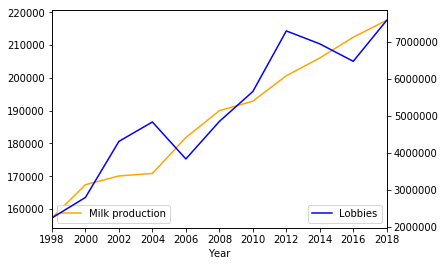

In [66]:
#Plot milk production and lobbies to Republicans on the same graph to see how they correlate 
lobbies = all_funding.iloc[4]
lobbies_every_other = lobbies[::2]

sampled_production = milk_production[::2]
sampled_production = sampled_production.iloc[9:20]


ax1 = sampled_production.plot(color = 'orange', label="Dairy production")
ax2 = lobbies_every_other.plot(secondary_y=True, color='blue', label="Lobbies")

ax1.legend(loc=3)
ax1.xaxis.set_ticks(lobbies_every_other.index)
ax2.legend(loc=4)

plt.show

Plotting annual milk production on the same graph as annual lobbies from the dairy industry, there is an identifiable correlation. This suggests that these lobbies successfully ensure laws are enacted that significantly aid dairy farmers, either financially or through a lack of industry regulation.

#### Milk Production and Subsudies

<function matplotlib.pyplot.show(*args, **kw)>

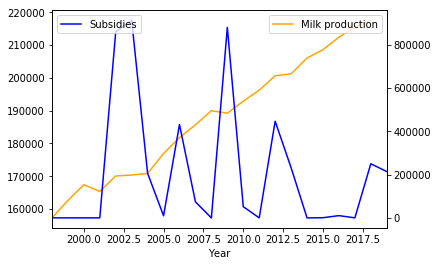

In [47]:
#Plot milk production and Government Payouts to the Dairy Industry to see if they correlate 
subsedies= all_funding.iloc[0:2]
sampled_production = milk_production.iloc[18:41]

ax1 = sampled_production.plot(color = 'orange', label="Dairy production")
ax2 = subsedies.sum().plot(secondary_y=True, color='blue', label="Subsidies")

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show

#### Congress Division


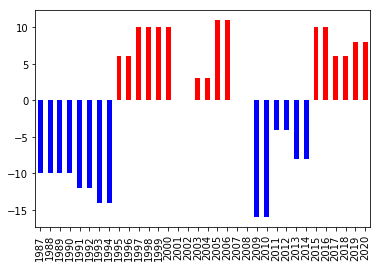

In [78]:
division = senate_division_per_year[["Democrats", "Republicans"]]
division['division'] = division['Republicans'] - division['Democrats']
division['division'].plot(color=(division['division'] > 0).map({True: 'r', False: 'b'}), kind ='bar')

Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64')
Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64')


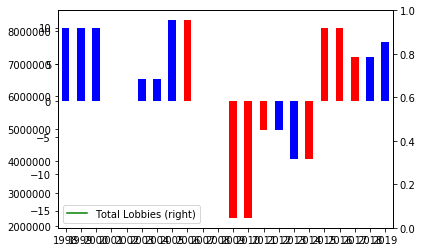

In [115]:
#fig, ax1 = plt.subplots(figsize = (15,8))
ax1 = all_funding.iloc[[4]].T.plot(secondary_y=True, color='green', label="Lobbies", kind = "line")
ax2 = ax1.twinx()
division['division'].iloc[11:33].plot(color=(division['division'] > 0).map({True: 'r', False: 'b'}), kind ='bar', ax=ax1)
#divison.plot(y = ['division'], kind = 'bar', ax = ax)
#df.plot(y= ['value1','value2'], kind = 'bar', ax = ax)
#division.plot(y = ['division'], kind = 'bar', ax = ax)
#all_funding.T.plot(y= ['Total Lobbies'], kind = 'line', ax = ax)

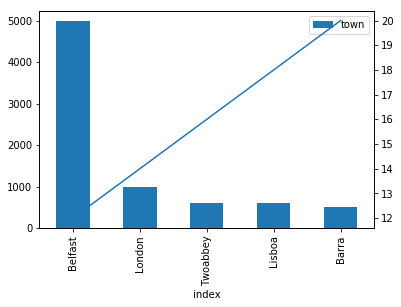

In [105]:
df = pd.DataFrame({"index" : ["Belfast", "London", "Twoabbey", "Lisboa", "Barra"],
                   "town" : [5000,1000,600,600,500],
                   "pop" : [12,14,16,18,20]})

ax1= df.plot.bar(y="town", x='index')

ax2 = ax1.twinx()

ax2.plot(df["index"], df["pop"])

plt.show()

#### Milk Production Growth Rate and Lobbies

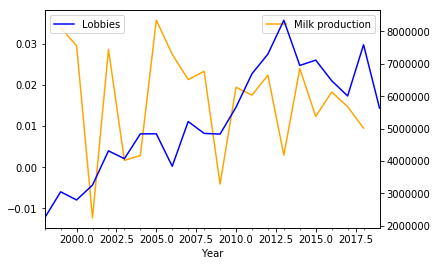

In [62]:
#Plot the growth of the milk industry 
sampled_production = milk_production.iloc[18:42]

ax1 = sampled_production.pct_change().plot(color = 'orange', label="Production growth")
ax2 = lobbies.plot(secondary_y=True, color='blue', label="Lobbies")

ax1.legend(loc=1)
ax1.xaxis.set_ticks(sampled_production.index, 90)
ax2.legend(loc=2)

plt.show()



#### Milk Production Growth Rate and Subsudies

<function matplotlib.pyplot.show(*args, **kw)>

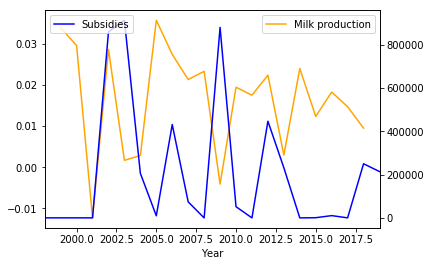

In [64]:
subsedies= all_funding.iloc[0:2]
sampled_production = milk_production.iloc[18:41]

ax1 = sampled_production.pct_change().plot(color = 'orange', label="Production growth")
ax2 = subsedies.sum().plot(secondary_y=True, color='blue', label="Subsidies")

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show